In [1]:
import fastf1 as f1
import fastf1.plotting as f1plt
from matplotlib import pyplot as plt

In [2]:
f1.set_log_level("Warning")
session = f1.get_session(2023, 'Mexico', 'Q')

session.load()

f1.plotting.setup_mpl(misc_mpl_mods=False)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\beast\AppData\Local\Temp\fastf1.
	Size: 97.59 MB


In [49]:
def telemetry_graph(session, drivers):
    laps = []
    for driver in drivers:
        laps.append(session.laps.pick_driver(driver).pick_fastest())

    fig, (tel, thr, drs) = plt.subplots(3, 1, sharex=True,figsize=(25,25),
            constrained_layout=True)

    tel_max = 0
    tel_min = 0
    dis_max = 0
    for lap in laps:
        tel_data = lap.get_telemetry()

        tel_max = tel_data['Speed'].max() if tel_max == 0 or tel_max < tel_data['Speed'].max() else tel_max
        dis_max = tel_data['Distance'].max() if dis_max == 0 or dis_max < tel_data['Distance'].max() else dis_max

        drs_data = []
        for drs_status in tel_data['DRS']:
            drs_data.append(1 if drs_status > 9 else 0)

        tel.plot(tel_data['Distance'], tel_data['Speed'], linewidth = 3.0, label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))
        thr.plot(tel_data['Distance'], tel_data['Throttle'], linewidth = 3.0,  label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))
        drs.plot(tel_data['Distance'], drs_data, linewidth = 3.0,  label=lap['Driver'] + " Lap " + str(lap['LapNumber']) + " " + str(lap['Compound']))


    tel.set_title(drivers[0] + " vs " + drivers[1], fontsize = 40)
    tel.set_ylabel('Speed [Km/h]', fontsize = 20)
    tel.set_xticklabels([])
    tel.set_yticks([x*50 for x in range(int(tel_max/50) + 2)], fontsize = 20)
    tel.tick_params('both', length=10.0)
    tel.legend(fontsize = 30)
    tel.grid()

    thr.set_ylabel('Throttle %', fontsize = 20)
    thr.set_xticklabels([])
    thr.set_yticks([x*50 for x in range(int(100/50 + 1))], fontsize = 20)
    thr.tick_params('both', length=10.0)
    thr.grid()

    drs.set_ylabel('DRS', fontsize = 20)
    drs.set_xticks([x*1000 for x in range(int(dis_max/1000) + 2)], fontsize = 20)
    drs.set_yticks([0,1])
    drs.set_yticklabels([0,1], fontsize = 20)
    drs.tick_params('both', length=10.0)
    drs.grid()

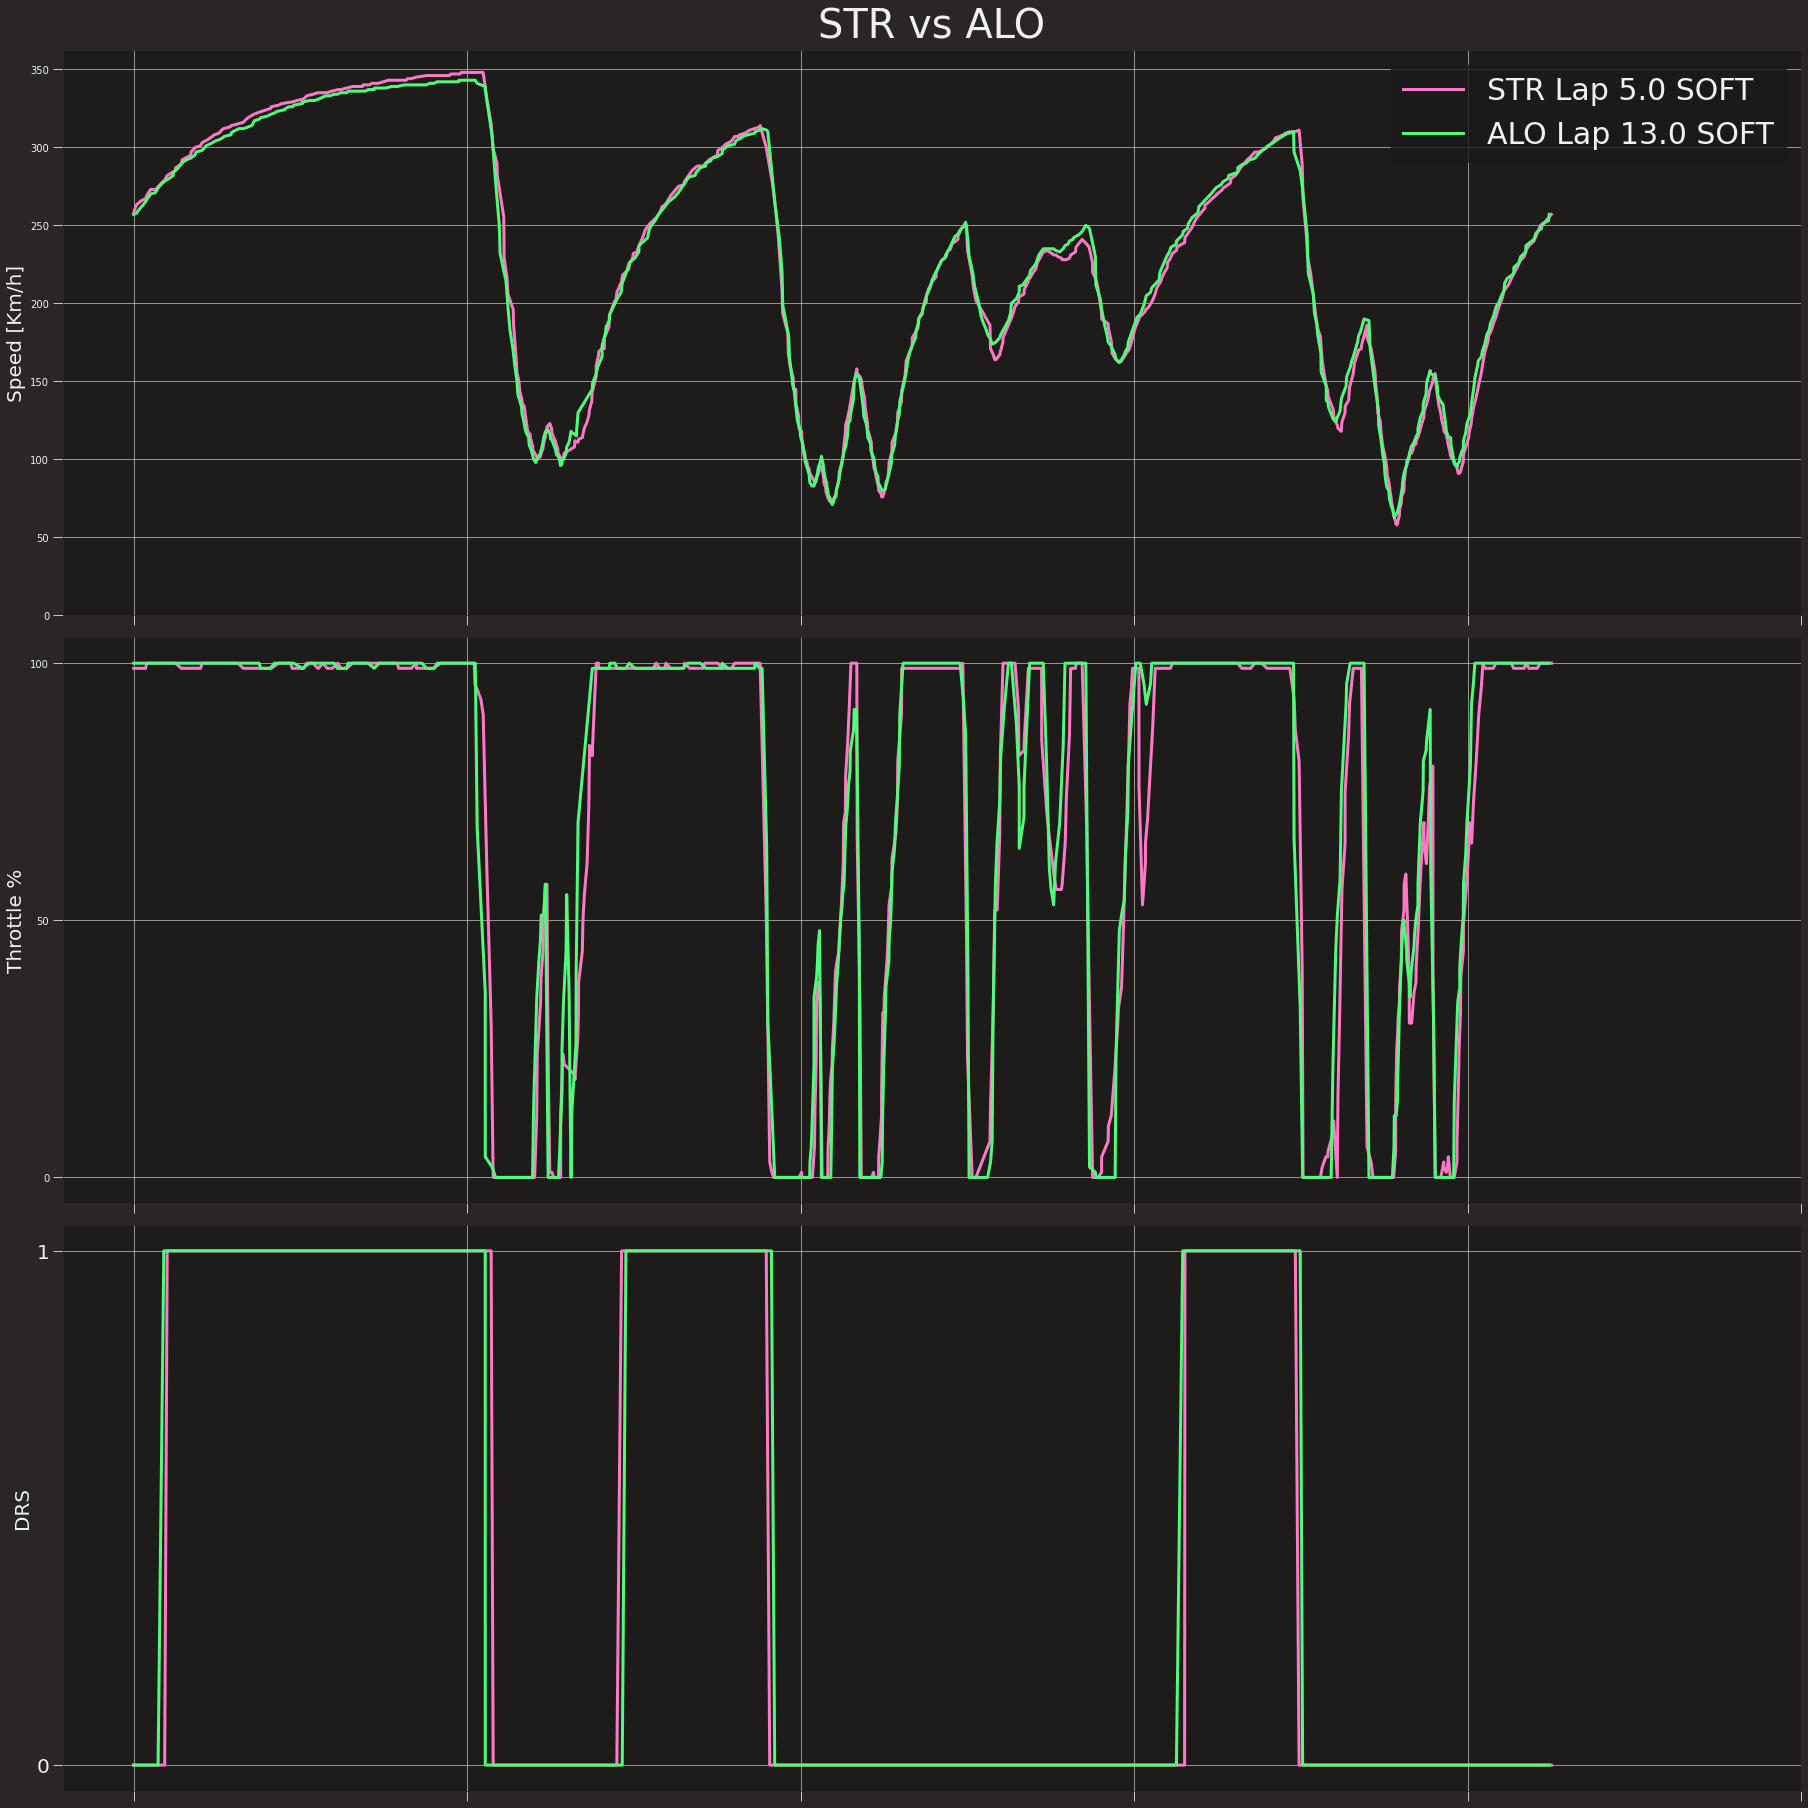

In [50]:
drivers = ['STR', 'ALO']

telemetry_graph(session, drivers)